Q.NeuralNetworks - GasTurbines
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.
Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [64]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
gasturbines = pd.read_csv("gas_turbines.csv")
gasturbines

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [4]:
gasturbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gasturbines.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [6]:
gasturbines[gasturbines.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [7]:
gasturbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

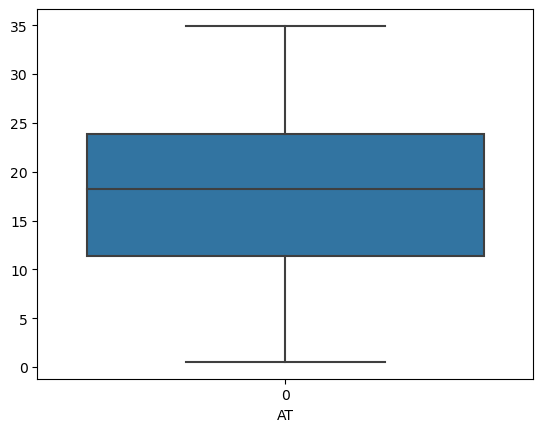

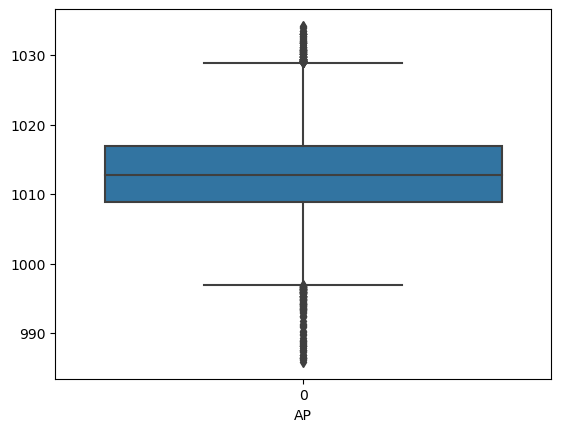

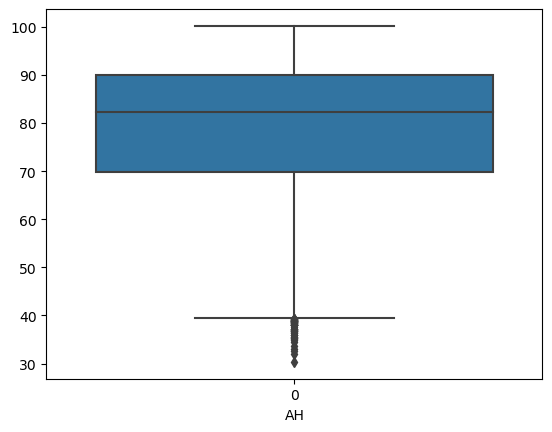

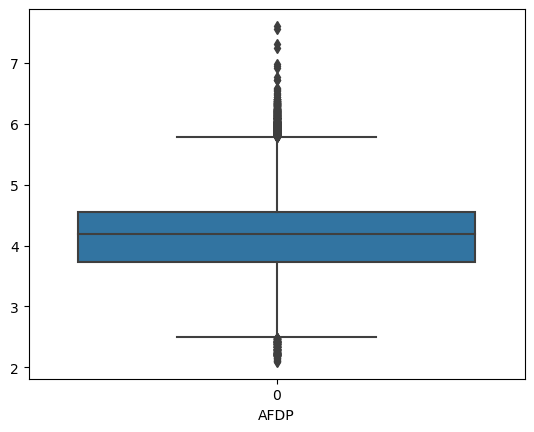

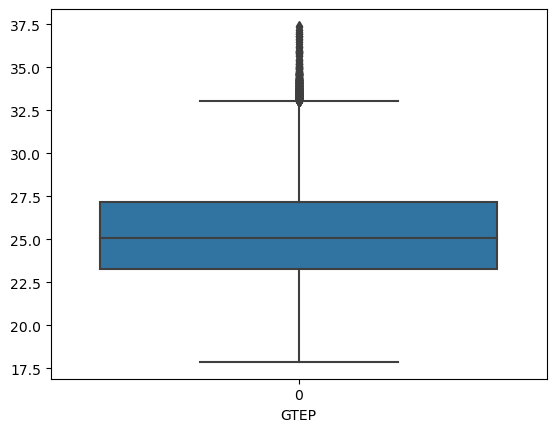

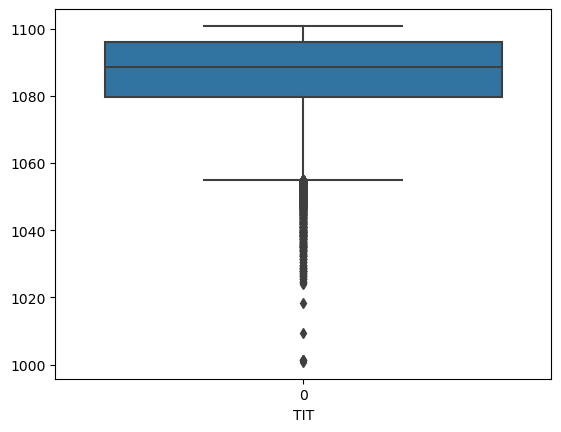

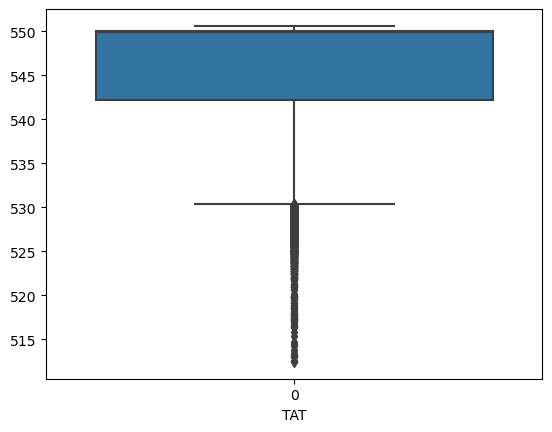

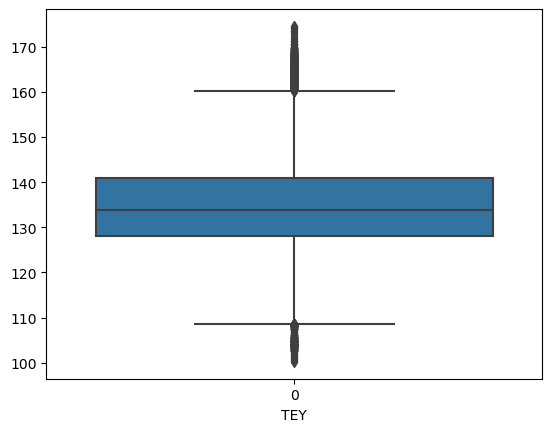

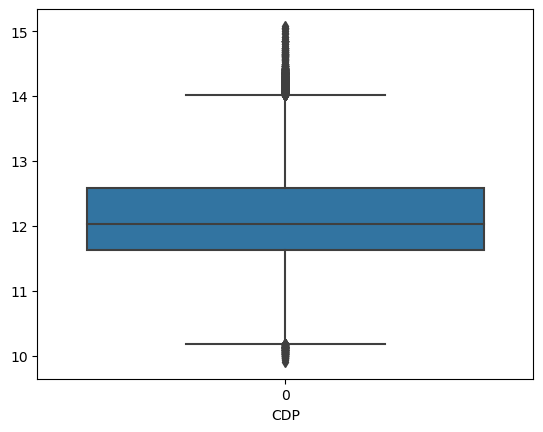

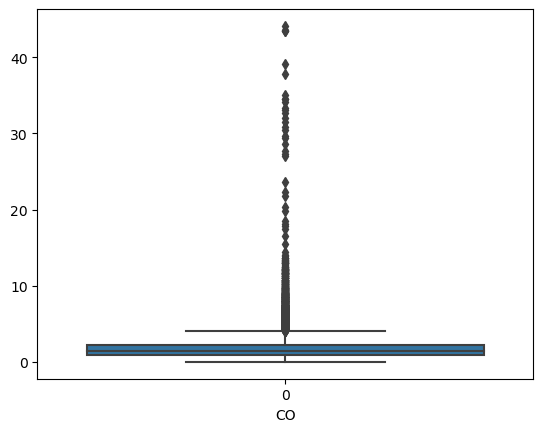

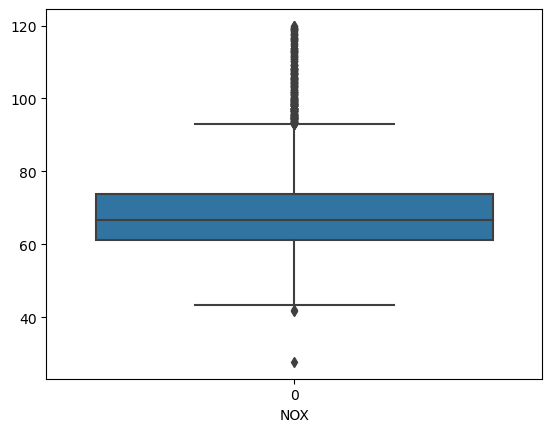

In [8]:
for i in gasturbines.columns:
    sns.boxplot(gasturbines[i])
    plt.xlabel(i)
    plt.show()

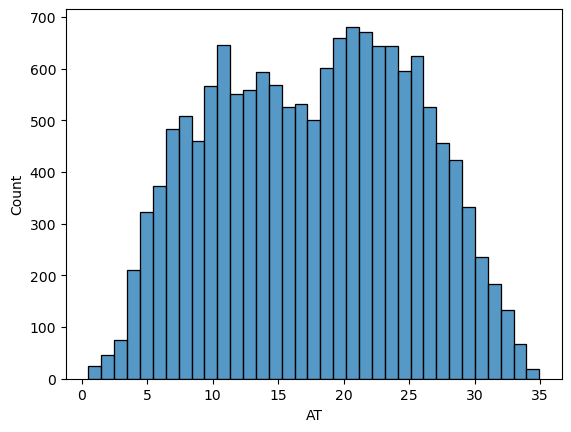

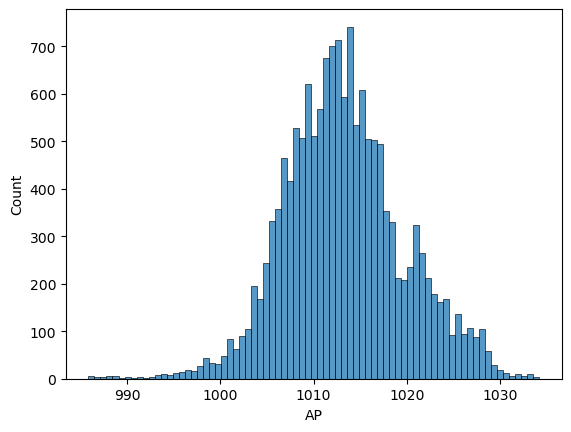

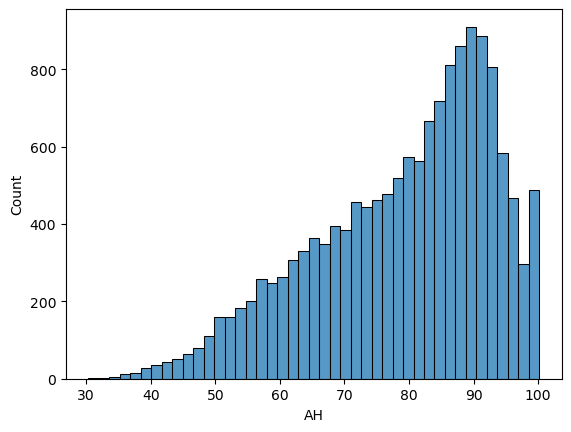

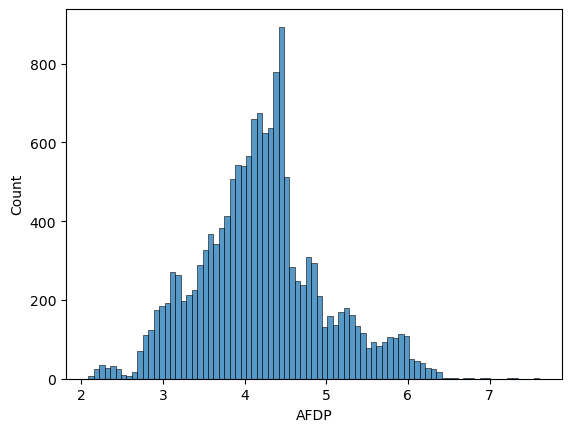

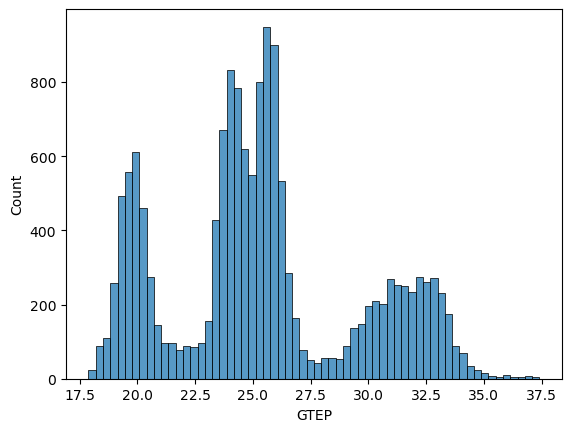

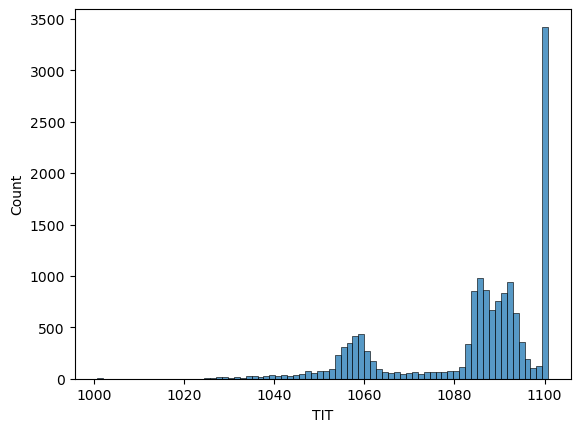

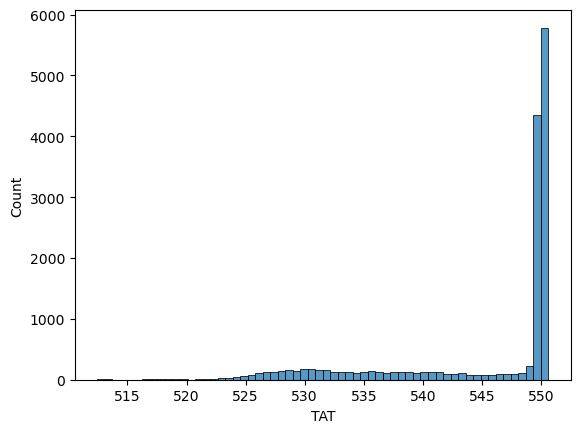

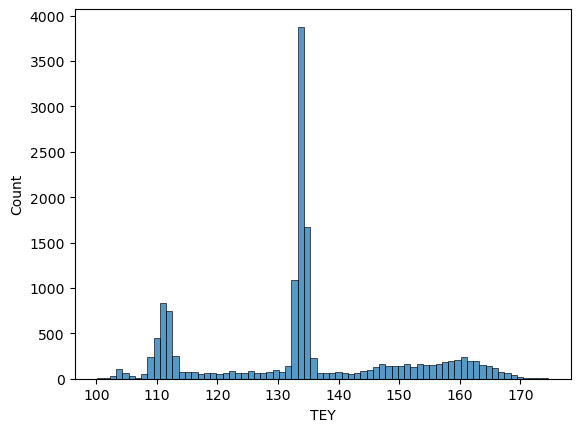

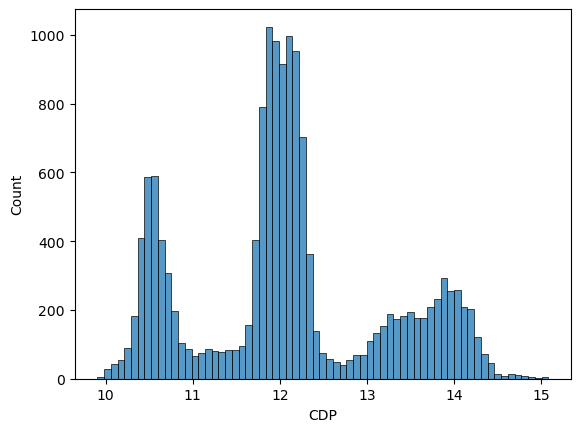

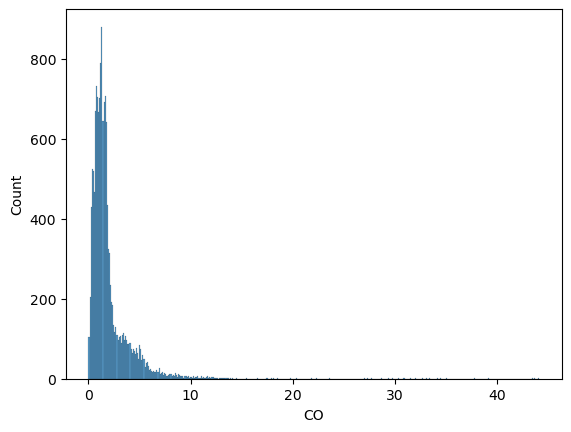

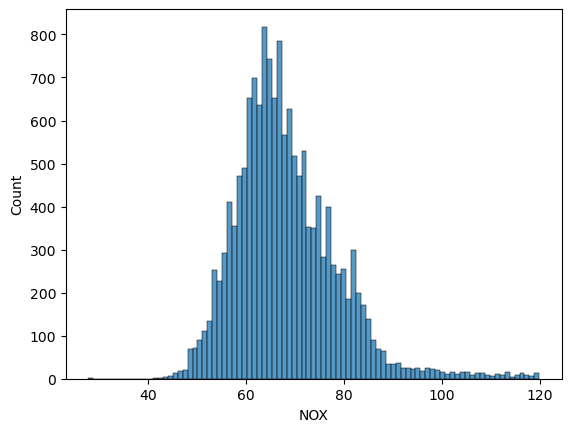

In [9]:
for i in gasturbines.columns:
    sns.histplot(gasturbines[i])
    plt.xlabel(i)
    plt.show()

<Axes: xlabel='TEY', ylabel='Density'>

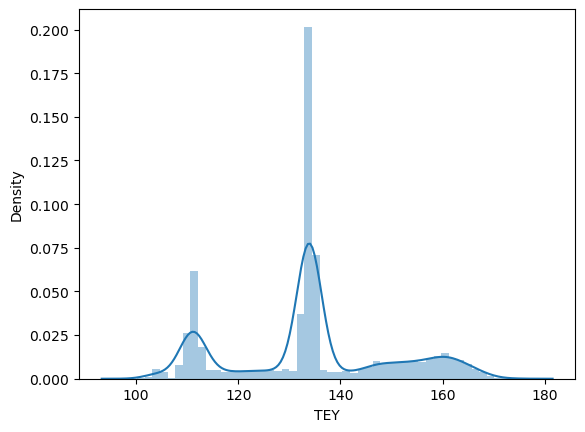

In [10]:
sns.distplot(gasturbines['TEY'])

<Axes: xlabel='TEY', ylabel='Count'>

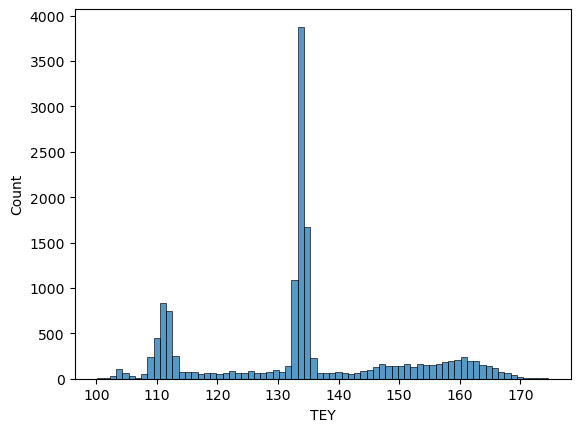

In [11]:
sns.histplot(gasturbines['TEY'])

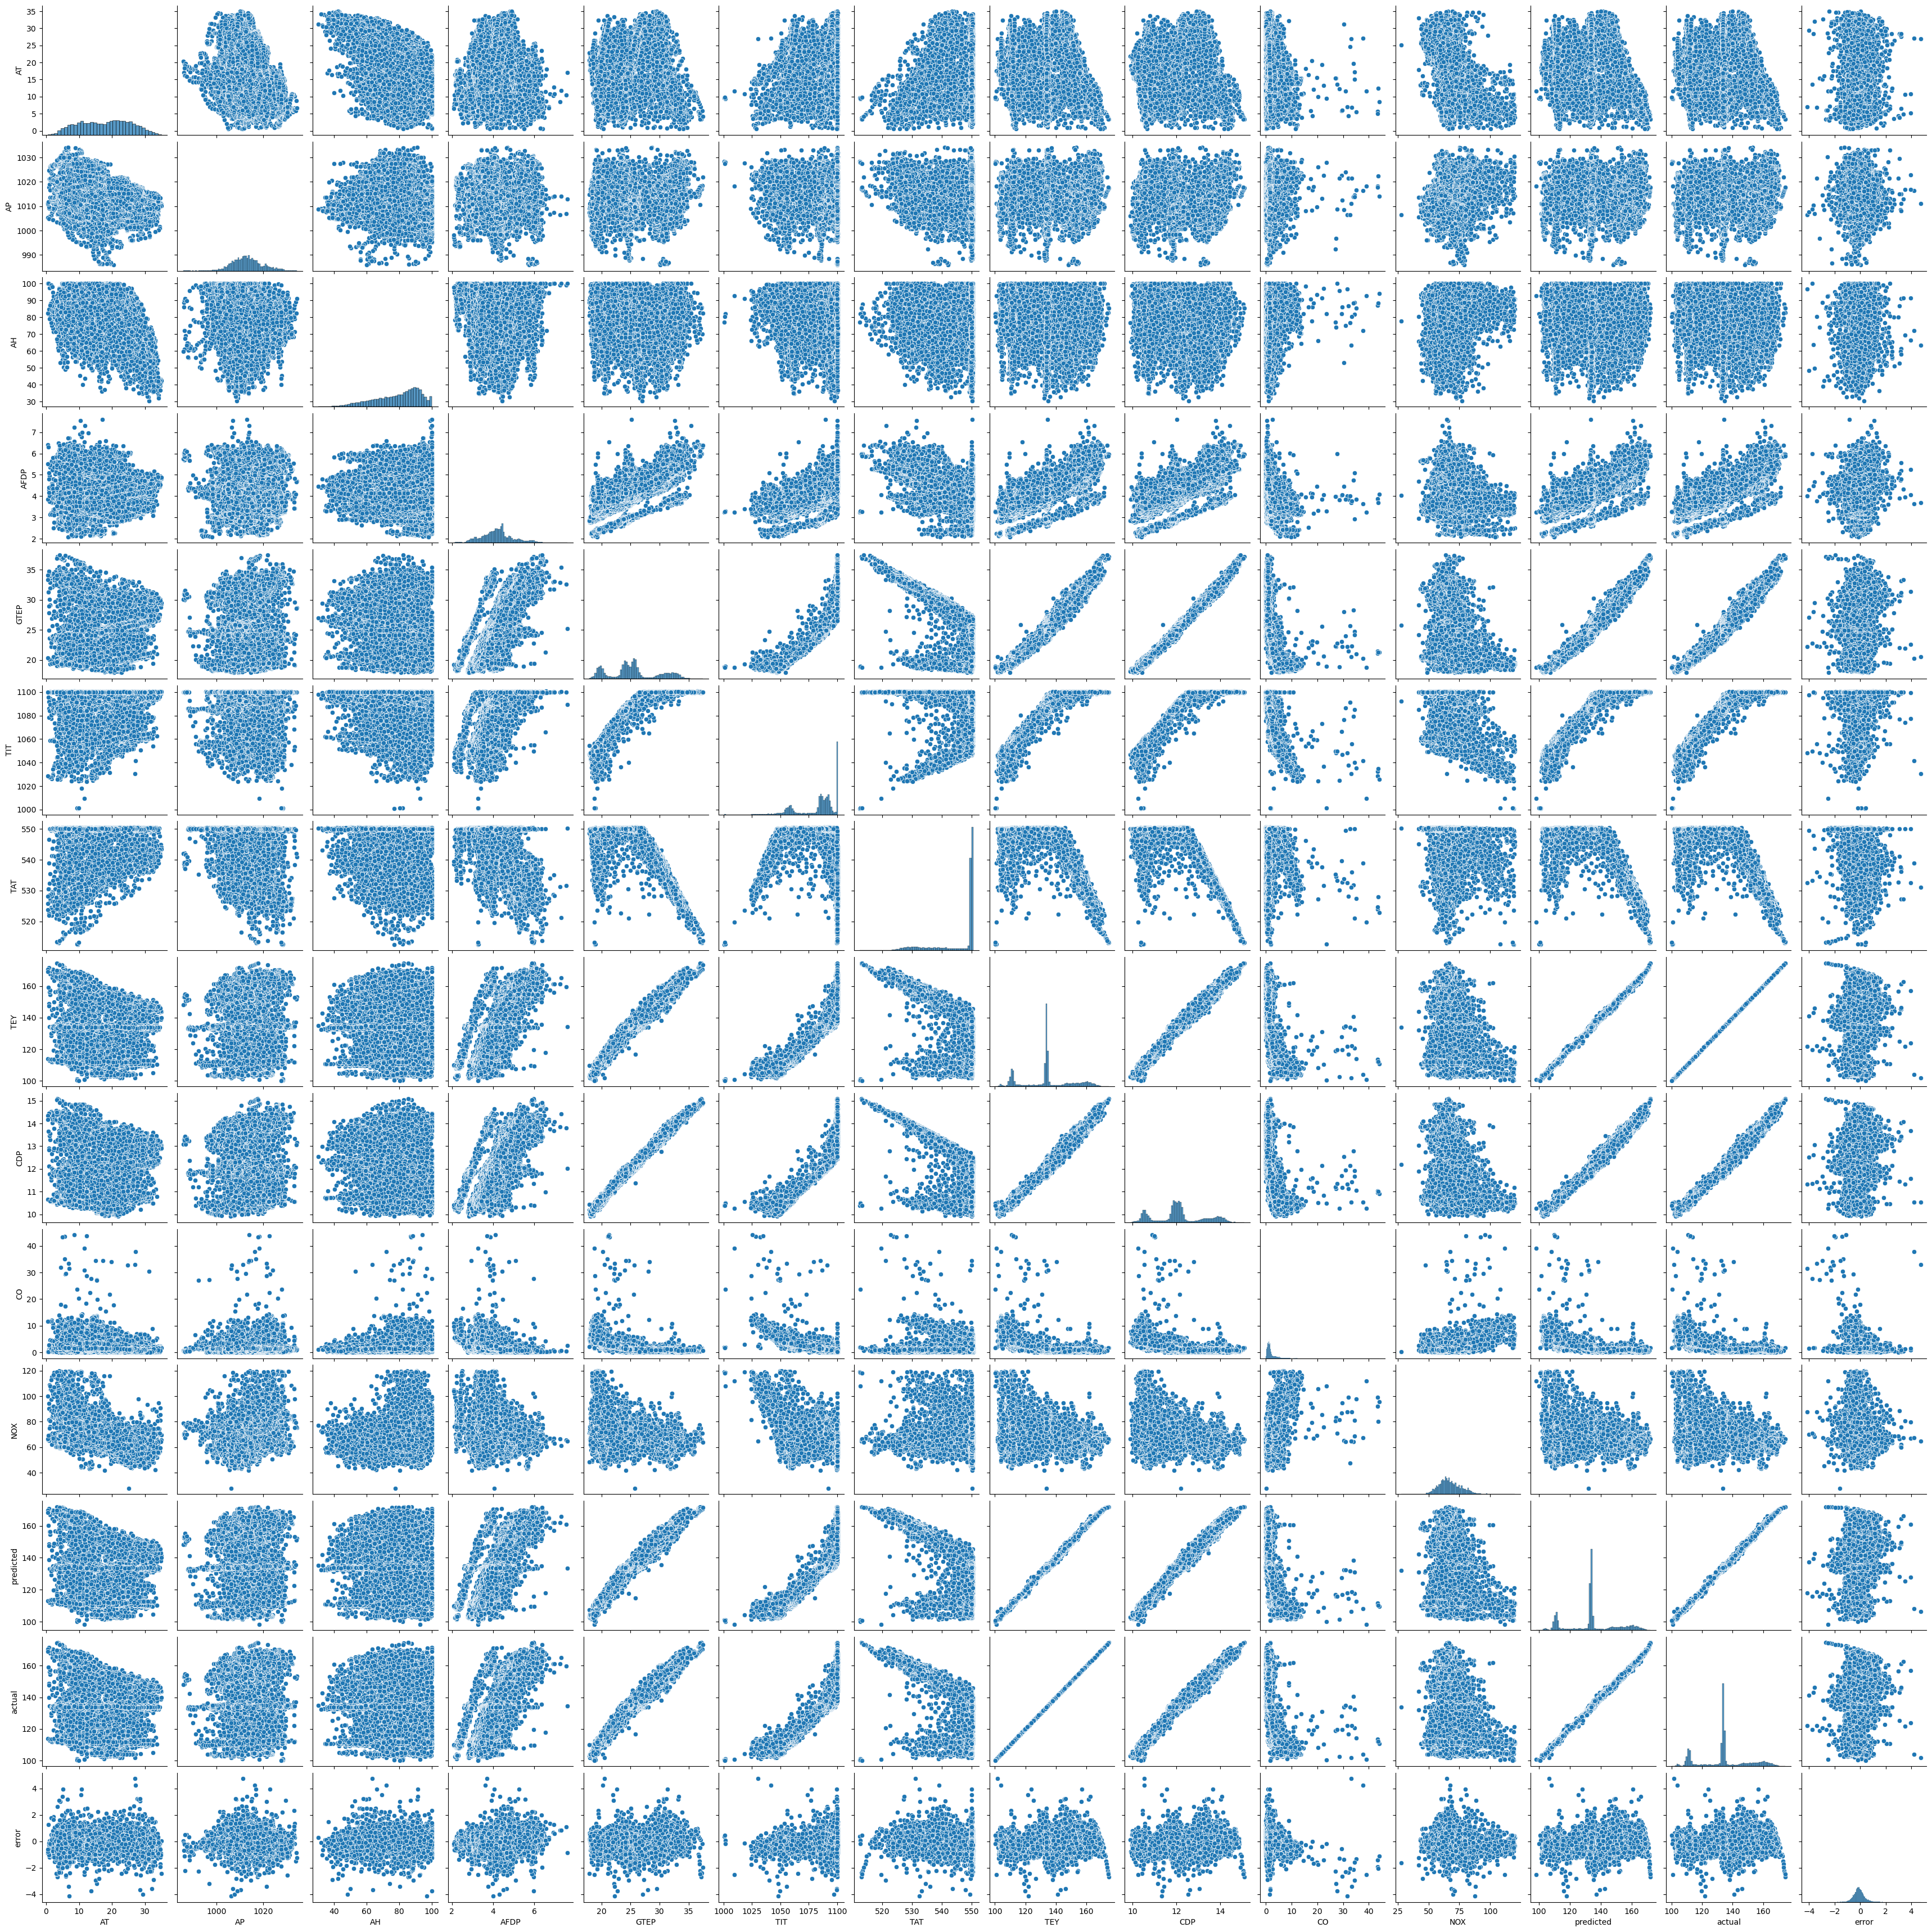

In [63]:
sns.pairplot(gasturbines)

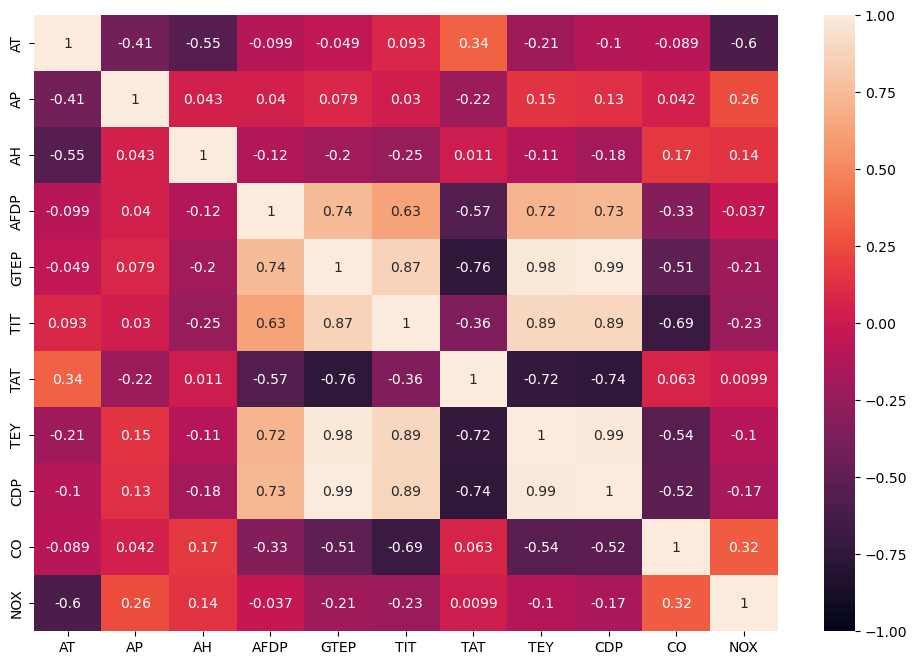

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(gasturbines.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [13]:
x = gasturbines.drop('TEY',axis=1)
y = gasturbines[['TEY']]

In [14]:
x.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [15]:
x_std=StandardScaler().fit_transform(x)

In [16]:
x_std

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=3)

In [18]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4th layer or output layer

In [19]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)                │        220 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │        210 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │        110 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │         11 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Fit the model
history = model.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=20) 

Epoch 1/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0000e+00 - loss: -3657.7527 - val_accuracy: 0.0000e+00 - val_loss: -95928.7031
Epoch 2/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: -309829.9688 - val_accuracy: 0.0000e+00 - val_loss: -1762185.3750
Epoch 3/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -2980662.7500 - val_accuracy: 0.0000e+00 - val_loss: -8575585.0000
Epoch 4/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -11874695.0000 - val_accuracy: 0.0000e+00 - val_loss: -25102486.0000
Epoch 5/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -31857112.0000 - val_accuracy: 0.0000e+00 - val_loss: -55931808.0000
Epoch 6/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -66330436.0000 - val_accuracy: 0.0000e+00 - val_loss: -105807248.0000
Epoch 7/250
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -12197834

In [22]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -25933140459520.0000
['loss', 'compile_metrics']
compile_metrics: 0.00%
[-26072653496320.0, 0.0]


In [23]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [24]:
# create model
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [25]:
pd.DataFrame(x_std).describe()

0             1             2             3             4  \
count  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04   
mean   4.913654e-16 -1.875504e-14  2.570219e-16  1.511894e-16 -7.559468e-17   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -2.276462e+00 -4.266288e+00 -3.536594e+00 -2.779497e+00 -1.806771e+00   
25%   -8.392292e-01 -6.706510e-01 -6.796337e-01 -6.266930e-01 -5.091458e-01   
50%    5.566605e-02 -6.227861e-02  2.277844e-01 -1.854065e-02 -8.075681e-02   
75%    8.051309e-01  5.772924e-01  7.916582e-01  4.612196e-01  4.228638e-01   
max    2.266234e+00  3.275970e+00  1.528011e+00  4.486233e+00  2.871006e+00   

                  5             6             7             8             9  
count  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  
mean  -3.260021e-15  1.640405e-15  1.965462e-16  3.779734e-17  4.233302e-16  
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  
min   -5.021933e+00 -4.188141e+00 -1.992416e+00 -8.874862e-01 -3.861033e+00  
25%   -2.540512e-01 -4.101146e-01 -4.354335e-01 -5.015202e-01 -6.578107e-01  
50%    2.965544e-01  5.712570e-01 -7.011925e-02 -2.620452e-01 -1.518527e-01  
75%    7.382490e-01  5.928675e-01  4.311680e-01  8.455882e-02  5.486567e-01  
max    1.028678e+00  6.627839e-01  2.700105e+00  1.895949e+01  4.937717e+00

In [26]:

def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    96.021428
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.559098
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.663308
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.722948
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    73.052693
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    94.803752
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.713701
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.719315
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 15 - epochs: 5 Accuracy: TEY    52.461775
dtype: float64
141/14

batchsize  epochs                         Accuracy
0          5       5  TEY    96.021428
dtype: float64
0          5      10  TEY    99.559098
dtype: float64
0          5      50  TEY    99.663308
dtype: float64
0          5     100  TEY    99.722948
dtype: float64
0         10       5  TEY    73.052693
dtype: float64
0         10      10  TEY    94.803752
dtype: float64
0         10      50  TEY    99.713701
dtype: float64
0         10     100  TEY    99.719315
dtype: float64
0         15       5  TEY    52.461775
dtype: float64
0         15      10  TEY    86.787927
dtype: float64
0         15      50  TEY    99.670937
dtype: float64
0         15     100  TEY    99.666569
dtype: float64
0         20       5  TEY    40.954679
dtype: float64
0         20      10  TEY    73.109674
dtype: float64
0         20      50  TEY    99.687067
dtype: float64
0         20     100  TEY    99.697646
dtype: float64

In [36]:
import tensorflow as tf
tf.keras.optimizers.Adam

keras.src.optimizers.adam.Adam

In [46]:
from keras.layers import Dropout
def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    learning_rate = [0.001]
    dropout_rate = [0.0,0.1,0.2]
    bestParamTable = pd.DataFrame()

    for lr in learning_rate:
        for dr in dropout_rate:
            model = Sequential()
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dropout(dr))
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            model.add(Dropout(dr))
            model.add(Dense(1, kernel_initializer='normal'))
            adam=Adam(learning_rate=lr)
            model.compile(optimizer =adam, loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=10, epochs=100,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[lr, dr, 100-MAPE]],
                                                        columns=['learning rate','dropout','Accuracy'] ))

            # printing the results of the current iteration
            print('learning rate:', lr,'-', 'dropout:',dr, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
learning rate: 0.001 - dropout: 0.0 Accuracy: TEY    99.724793
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
learning rate: 0.001 - dropout: 0.1 Accuracy: TEY    98.801411
dtype: float64
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
learning rate: 0.001 - dropout: 0.2 Accuracy: TEY    98.573901
dtype: float64


learning rate  dropout                         Accuracy
0          0.001      0.0  TEY    99.724793
dtype: float64
0          0.001      0.1  TEY    98.801411
dtype: float64
0          0.001      0.2  TEY    98.573901
dtype: float64

In [47]:
#final model
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='normal'))
adam=Adam(0.001)
model.compile(optimizer =adam, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(x_train, y_train , batch_size=5, epochs=100,  verbose=0)

In [48]:
y_pred = model.predict(x_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [49]:
y_pred

array([[163.8816  ],
       [133.24199 ],
       [163.40428 ],
       ...,
       [111.57039 ],
       [109.715515],
       [133.66594 ]], dtype=float32)

In [50]:
y_test

TEY
8185   164.34
8994   133.67
8944   163.41
3451   109.78
8236   135.01
...       ...
4964   133.78
9159   137.00
12903  111.53
6025   109.77
7677   133.68

[4512 rows x 1 columns]

In [51]:
Y_pred=model.predict(x_train)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [52]:
Y_pred

array([[136.39134],
       [133.86845],
       [133.8983 ],
       ...,
       [133.32797],
       [141.93155],
       [134.4161 ]], dtype=float32)

In [53]:
y_train

TEY
13383  135.92
13172  133.87
8356   133.66
2683   154.48
3266   133.82
...       ...
9160   155.62
9859   156.74
11513  133.70
1688   142.06
5994   134.36

[10527 rows x 1 columns]

In [54]:
y_pred=model.predict(x_std)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
y_pred

array([[114.97244 ],
       [115.05589 ],
       [115.18228 ],
       ...,
       [110.206314],
       [111.14728 ],
       [111.876724]], dtype=float32)

In [56]:
gasturbines['predicted']=y_pred
gasturbines['actual']=gasturbines['TEY']

In [57]:
gasturbines.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX   predicted  actual  
0  3.1547  82.722  114.972443  114.70  
1  3.2363  82.776  115.055893  114.72  
2  3.2012  82.468  115.182281  114.71  
3  3.1923  82.670  115.186752  114.72  
4  3.2484  82.311  115.218445  114.72

In [58]:
gasturbines['error']=gasturbines['predicted']-gasturbines['actual']
gasturbines['error']

0        0.272443
1        0.335893
2        0.472281
3        0.466752
4        0.498445
           ...   
15034   -0.445617
15035   -0.209810
15036    0.016314
15037    0.407278
15038    0.296724
Name: error, Length: 15039, dtype: float64

In [59]:
gasturbines.to_csv("gasTurbine_modelOutPut.csv")

In [60]:
gasturbines.error.mean()

-0.0973041139586554

In [61]:
gasturbines.error.std()

0.4858387548030224

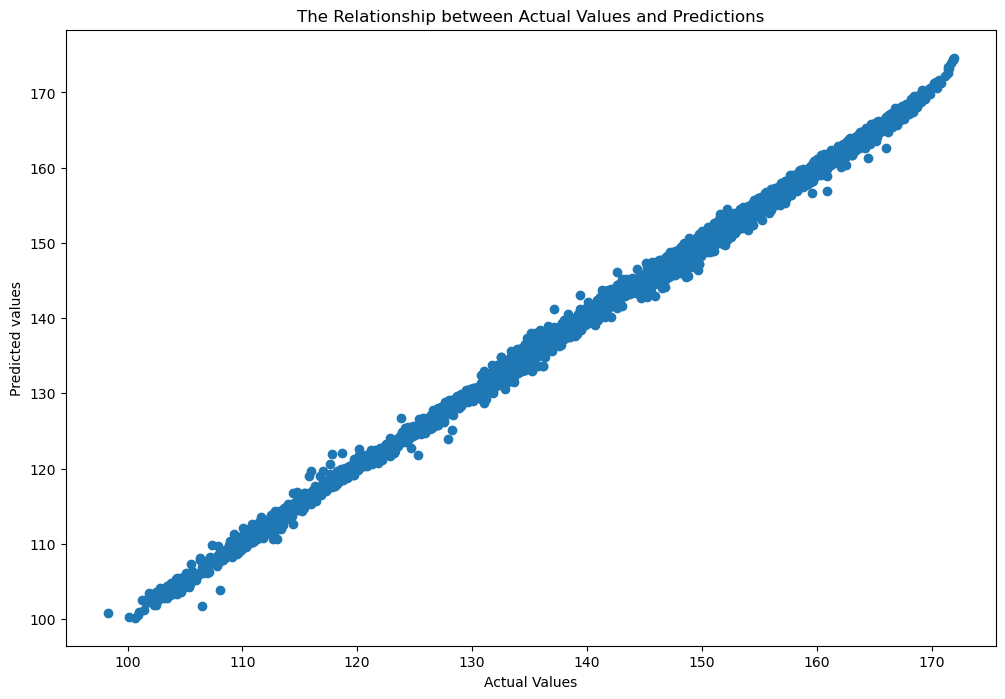

In [62]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Relationship between Actual Values and Predictions")
plt.scatter(gasturbines['predicted'],gasturbines['actual'])